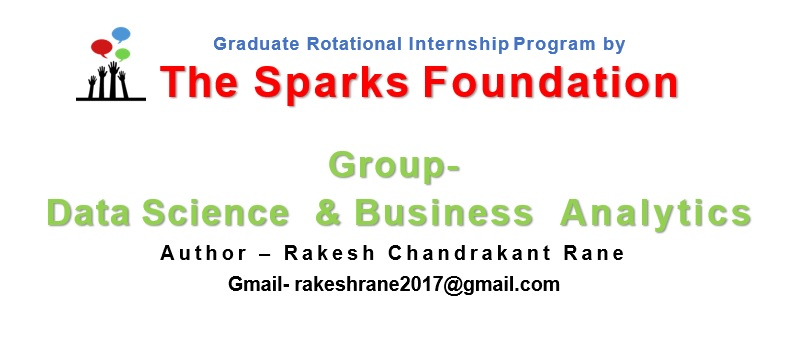

# Task Group- Computer  Vision &  Internet of  Things
## Task 2 - Color Identification in Images
### Task problem- Implement an image color detector which identiﬁes all the colors in an  image or video.


## 1) Load image and preprocessing

In [1]:
# import all library
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

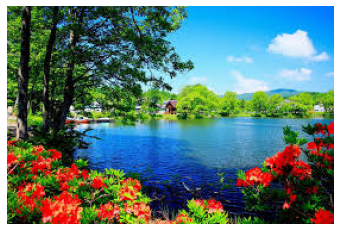

In [2]:
#loading image 
image = cv2.imread('nature.jpg') # input image in BGR format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert BGR image to RBG format
plt.imshow(image)
plt.axis("off")
plt.show()

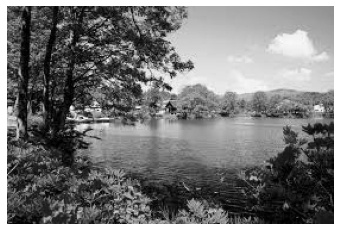

In [3]:
# Conveting input image to gray scale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.show()

In [4]:
# conveting RGB image to hex
def RGB2HEX(color):
    
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [5]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

## 2) Clusting to extract color

In [6]:
# modifie image to proper shape and size
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

In [7]:
# using kmens clustering we find number of color present in image
def get_colors(image,number_of_colors):
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    return rgb_colors, hex_colors, counts

In [8]:
RGB,HEX,counts = get_colors(get_image('nature.jpg'),10) # load image to find color

## 3) ploting result

In [9]:
# hex color to RGB convertor
rgb_color = []
from colormap import hex2rgb

for color in HEX:
    rgb = hex2rgb(color)
    rgb_color.append(rgb)


In [10]:
# all list of valid colour whose name is present in css3
COLORS = ((240,248,255),(250,235,215),(0,255,255),(127,255,212),(240,255,212),(240,255,255),(245,245,220),(255,228,196),(0,0,0),(255,235,205),(0,0,255),(138,43,226),(165,42,42),(222,184,135),(95,158,160),(127,255,0),(210,105,30),(255,127,80),(220,20,60),(0,255,255),(0,0,139),
          (0,139,139),(184,134,11),(169,169,169),(0,100,0),(169,169,169),(189,183,107),(139,0,139),(85,107,47),(255,140,0),(153,50,204),(139,0,0),(233,150,122),(143,188,143),(72,61,139),(47,79,79),(47,79,79),(0,206,209),(148,0,211),(255,20,147),(0,191,255),(105,105,105),
          (30,144,255),(178,34,34),(255,250,240),(34,139,34),(255,0,255),(220,220,220),(248,248,255),(255,215,0),(218,165,32),(128,128,128),(0,128,0),(173,255,47),(128,128,128),(128,128,128),(128,128,128),(173,255,47),(240,255,240),(255,105,180),(205,92,92),(205,92,92),(205,92,92),(75,0,130),
          (255,255,240),(240,230,140),(230,230,250),(255,240,245),(124,252,0),(255,250,205),(173,216,230),(224,255,255),(250,250,210),(211,211,211),(144,238,144),(211,211,211),(211,211,211),(211,211,211),(255,182,193),(255,160,122),(32,178,170),(135,206,250),(119,136,153),(119,136,153),(176,196,222),(255,255,224),
          (0,255,0),(50,205,50),(250,240,230),(255,0,255),(128,0,0),(102,205,170),(0,0,205),(0,0,205),(186,85,211),(147,112,219),(60,179,113),(123,104,238),(0,250,154),(72,209,204),(72,209,204),(199,21,133),(25,25,112),(245,255,250),(255,228,225),(255,228,181),(255,222,173),
          (0,0,128),(253,245,230),(128,128,0),(107,142,35),(255,165,0),(255,69,0),(218,112,214),(238,232,170),(152,251,152),(175,238,238),(219,112,147),(255,239,213),(255,218,185),(205,133,63),(255,192,203),(221,160,221),(176,224,230),(128,0,128),(255,0,0),(188,143,143),(65,105,225),(139,69,19),
          (250,128,114),(244,164,96),(46,139,87),(255,245,238),(160,82,45),(192,192,192),(135,206,235),(106,90,205),(112,128,144),(255,250,250),(0,255,127),(70,130,180),(210,180,140),(0,128,128),(216,191,216),(255,99,71),(64,224,208),(238,130,238),(245,222,179),(255,255,255),(245,245,245),(255,255,0),(154,205,50)
         )

In [11]:
# convert color value to respective colour name
from math import sqrt
import webcolors

def closest_color(rgb):
    r, g, b = rgb
    color_diffs = []
    for color in COLORS:
        cr, cg, cb = color
        color_diff = sqrt(abs(r - cr)**2 + abs(g - cg)**2 + abs(b - cb)**2)
        color_diffs.append((color_diff, color))
    return min(color_diffs)[1]

def get_color_name(requested_color):
    try:
        color_name = webcolors.rgb_to_name(requested_color)
    except ValueError:
        color_name = closest_color(requested_color)
        color_name = webcolors.rgb_to_name(color_name)
    return color_name 


 Input Image


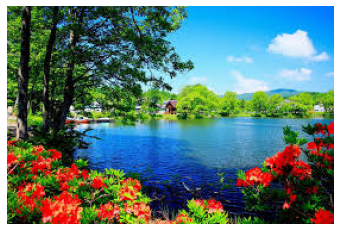

List of color present in above image


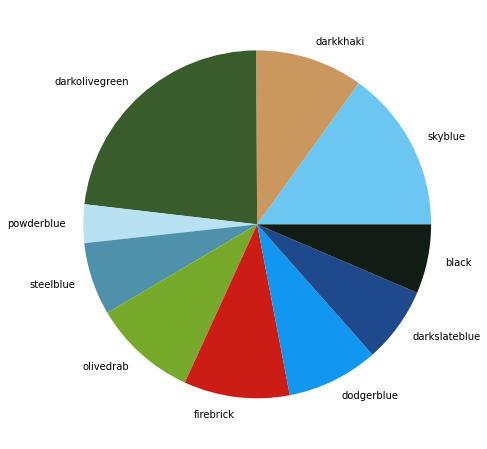

In [13]:
# plot original image
print(" Input Image")
plt.imshow(image)
plt.axis("off")
plt.show()

# plot colur and it name using pie chart
color_name = []

for color in rgb_color:
    name = get_color_name(color)
    color_name.append(name)
    
print("List of color present in above image")
plt.figure(figsize = (8, 8))
plt.pie(counts.values(), labels = color_name, colors = HEX)

plt.show()

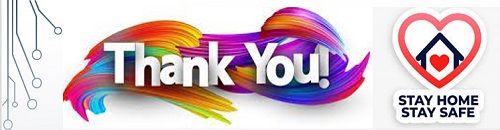